<a href="https://colab.research.google.com/github/chrisvidetto1/Portfolio/blob/master/API_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Guide to Working with API's
##### By: Chris Videtto
##### Based on: 2nd Edition Python Crash Course

### Requesting Data Using an API Call

In [52]:
# Import the packages first
import requests
import pandas as pd

In [6]:
# Make an API call and store the response in a variable

url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)

#Print the value of Status Code to make sure the call was successful
print(f"Status code: {r.status_code}")

Status code: 200


In [ ]:
# View the API response as a .json
response_dict = r.json()
response_dict

### Working with the Response Dictionary

In [8]:
# Examine results
print(response_dict.keys())

print(f"Total repositories: {response_dict['total_count']}")

dict_keys(['total_count', 'incomplete_results', 'items'])
Total repositories: 5488676


In [9]:
# Explore information about the repositories 
repo_dicts = response_dict['items']
print(f"Repositories returned: {len(repo_dicts)}")

Repositories returned: 30


In [ ]:
# Examine the first repository
repo_dict = repo_dicts[0]
print(f"\nKeys: {len(repo_dict)}")
for key in sorted(repo_dict.keys()):
    print(key)


Keys: 74
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
trees_url
updated_at
url
watchers
watchers_count


In [ ]:
repo_dicts

In [51]:
### Lets create a function to print out information for the top repositories
repo_dicts = response_dict['items']
print(f"Total Repositories returned: {len(repo_dicts)}")
repo2 = repo_dicts[0:5]
print(f"Sliced Repositories returned: {len(repo2)}")
for repo_dict in repo2:
      print("\nSelected information about each repository:")
      print(f"Name: {repo_dict['name']}")
      print(f"Owner: {repo_dict['owner']['login']}")
      print(f"Stars: {repo_dict['stargazers_count']}")
      print(f"Repository: {repo_dict['html_url']}")
      print(f"Created: {repo_dict['created_at']}")
      print(f"Updated: {repo_dict['updated_at']}")
      print(f"Description: {repo_dict['description']}")

Total Repositories returned: 30
Sliced Repositories returned: 5

Selected information about each repository:
Name: system-design-primer
Owner: donnemartin
Stars: 108169
Repository: https://github.com/donnemartin/system-design-primer
Created: 2017-02-26T16:15:28Z
Updated: 2020-09-30T14:12:46Z
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Selected information about each repository:
Name: awesome-python
Owner: vinta
Stars: 87215
Repository: https://github.com/vinta/awesome-python
Created: 2014-06-27T21:00:06Z
Updated: 2020-09-30T14:27:11Z
Description: A curated list of awesome Python frameworks, libraries, software and resources

Selected information about each repository:
Name: Python
Owner: TheAlgorithms
Stars: 86247
Repository: https://github.com/TheAlgorithms/Python
Created: 2016-07-16T09:44:01Z
Updated: 2020-09-30T14:17:21Z
Description: All Algorithms implemented in Python

Selected information about each repos

### Monitoring API Rate Limits

In [ ]:
# Create an API call and store the response

url = 'https://api.github.com/rate_limit'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)

# View the API response as a .json 
API_rate_limits = r.json()
API_rate_limits

{'rate': {'limit': 60, 'remaining': 60, 'reset': 1601425260, 'used': 0},
 'resources': {'core': {'limit': 60,
   'remaining': 60,
   'reset': 1601425260,
   'used': 0},
  'graphql': {'limit': 0, 'remaining': 0, 'reset': 1601425260, 'used': 0},
  'integration_manifest': {'limit': 5000,
   'remaining': 5000,
   'reset': 1601425260,
   'used': 0},
  'search': {'limit': 10, 'remaining': 9, 'reset': 1601421719, 'used': 1}}}

### Visualizing Repositories Using Plotly

In [ ]:
from plotly.graph_objs import Bar
from plotly import offline

In [167]:
# Make an API call and store the response in a variable

url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept': 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)

#Print the value of Status Code to make sure the call was successful
print(f"Status code: {r.status_code}")

Status code: 200


In [168]:
# Process results from initial API call
response_dict = r.json()
repo_dicts = response_dict['items']
repo_names, stars = [], []
for repo_dict in repo_dicts:
  repo_names.append(repo_dict['name'])
  stars.append(repo_dict['stargazers_count'])

In [ ]:
# Make visualization

data = [{
    'type' : 'bar',
    'x' : repo_names,
    'y' : stars,
}]

my_layout = {
    'title' : 'Most-Starred Python Projects on Github',
    'xaxis' : {'title': 'Repository'},
    'yaxis' : {'title': 'Stars'},
}

fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='python_repos.html')
import plotly.io as pio
pio.show(fig)

In [ ]:
### Different Visualization
temp = px.bar(response_dict, x=repo_names, y=stars, title="Most-Starred Repositories on GitHub")
temp.update_layout(yaxis=dict(range=[0,90000]))
temp

In [148]:
New = {}
for name in repo_names:
  for number in stars:
    New[name] = number
    stars.remove(number)
    break

In [ ]:
df=pd.DataFrame(list(zip(repo_names, stars)),
                columns = ['Repo Name', 'Stars'])
df

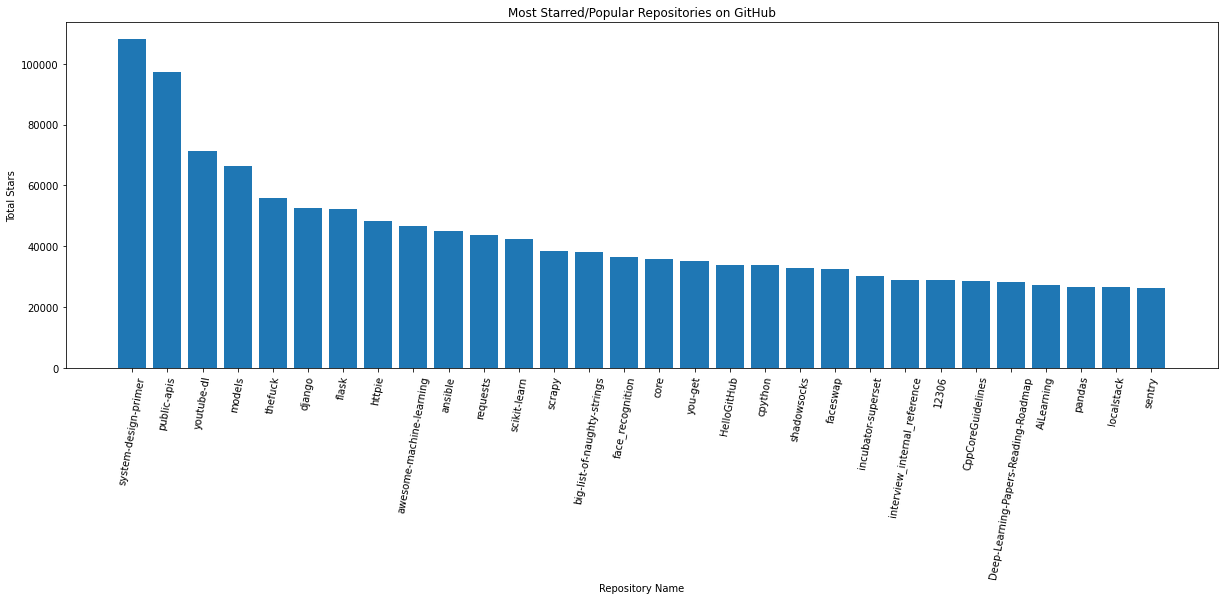

In [185]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[16, 4.8])
ax = fig.add_axes([0,0,1,1])
x = repo_names
y = stars
ax.bar(x, y)
plt.xticks(rotation=80)
plt.xlabel('Repository Name')
plt.ylabel('Total Stars')
plt.title('Most Starred/Popular Repositories on GitHub')
plt.show()